In [115]:
import pandas as pd
import datetime
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [116]:
data=pd.read_csv('C:\\Users\\shash\\Downloads\\feature_seln_new.csv')

In [117]:
data['START_TIME'] = pd.to_datetime(data['START_TIME'])

In [118]:
df=data[data.columns[1:]]
df=df.set_index('START_TIME')
df.shape

(2952, 41)

In [119]:
df=df.to_numpy()

In [120]:
def detect_anomalies_by_attribute(data, window_size, threshold):
    # compute sliding window z-scores for each attribute
    zscores = sliding_zscores_by_attribute(data, window_size)

    # compute absolute z-scores and compare to threshold
    abs_zscores = np.abs(zscores)
    anomalies = np.argwhere(abs_zscores > threshold)

    return anomalies

In [121]:
def sliding_zscores_by_attribute(data, window_size):
    # initialize output array
    zscores_by_attribute = np.zeros_like(data)

    # compute z-scores for each attribute
    for i in range(data.shape[1]):
        attribute_data = data[1:, i]
        attribute_zscores = sliding_zscore(attribute_data, window_size)
        zscores_by_attribute[1:, i] = attribute_zscores.reshape(-1)
    return zscores_by_attribute

In [122]:
def sliding_zscore(data, window_size):
    # compute mean and standard deviation for the data
    means = np.mean(data)
    stds = np.std(data)

    # initialize output array
    zscores = np.zeros_like(data)

    # compute z-score for each sample using sliding window concept
    for i in range(window_size, data.shape[0]+1):
        window = data[i-window_size:i]
        zscore = (data[i-1] - np.mean(window)) / np.std(window)
        zscores[i-1] = zscore

    return zscores

In [123]:
def plot_anomalies_by_attribute(data, anomalies):
    # plot each attribute and highlight anomalies
    n_attributes = data.shape[1]
    fig, axs = plt.subplots(n_attributes, 1, figsize=(10, n_attributes*3))
    for i in range(n_attributes):
        axs[i].plot(data[1:, i])
        axs[i].set_xlabel("Data Point")
        axs[i].set_ylabel("Z-score")
        axs[i].set_title(f"Attribute {i+1}")
        for anomaly in anomalies:
            if anomaly[1] == i:
                axs[i].axvline(x=anomaly[0], color='red')

    plt.tight_layout()
    plt.show()

C:\Users\shash\AppData\Local\Temp\ipykernel_8904\3171653855.py:12: RuntimeWarning: invalid value encountered in double_scalars
  zscore = (data[i-1] - np.mean(window)) / np.std(window)


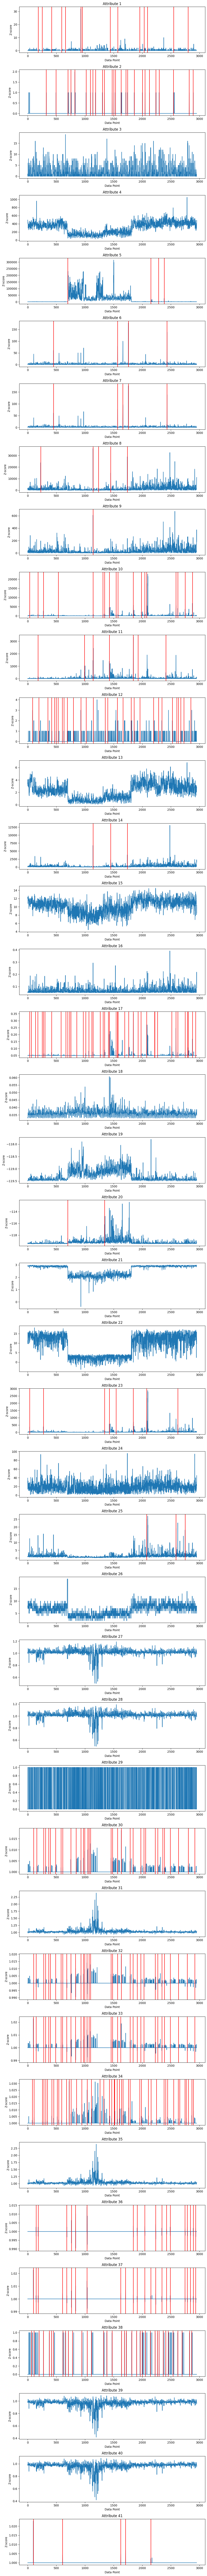

In [168]:
anomalies = detect_anomalies_by_attribute(df, window_size=24, threshold=4.7)
plot_anomalies_by_attribute(df, anomalies)

C:\Users\shash\AppData\Local\Temp\ipykernel_8904\3171653855.py:12: RuntimeWarning: invalid value encountered in double_scalars
  zscore = (data[i-1] - np.mean(window)) / np.std(window)


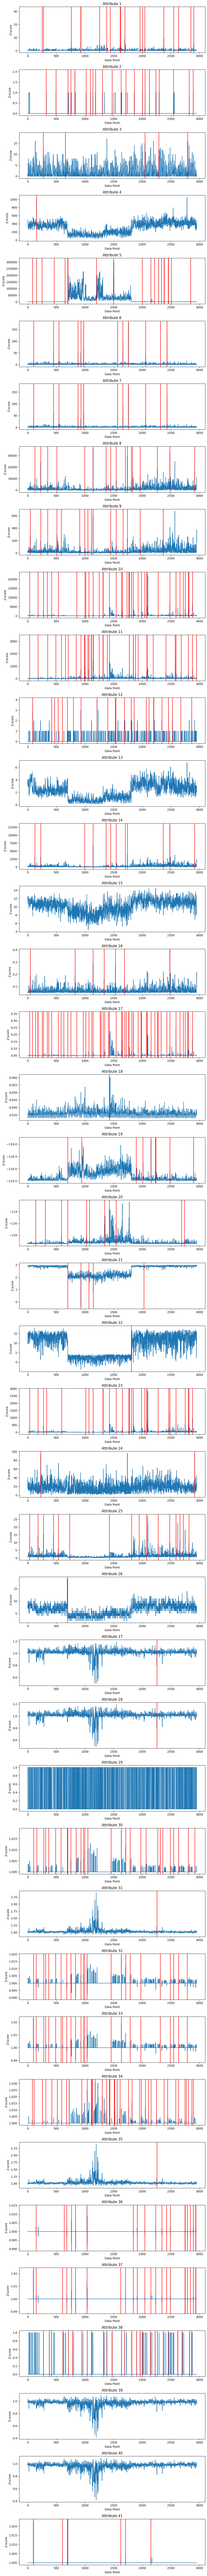

In [166]:
anomalies = detect_anomalies_by_attribute(df, window_size=36, threshold=4.7)
plot_anomalies_by_attribute(df, anomalies)